## Multiple Linear Regression

##  Startups Data

### Prepare a Prediction Model for profit of 50_startups data.

**Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.**


## 1. Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Importing Data

In [2]:
startups_data=pd.read_csv('50_Startups.csv')
startups_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startups_data.rename(columns={'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'}, inplace=True)
startups_data.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## 3. Data Understanding

### 3.1 Initial Analysis

In [4]:
startups_data.shape

(50, 5)

In [5]:
startups_data.isna().sum()

RD_Spend           0
Administration     0
Marketing_Spend    0
State              0
Profit             0
dtype: int64

In [6]:
startups_data.dtypes

RD_Spend           float64
Administration     float64
Marketing_Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
startups_data.describe()

,RD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### 3.2 ASSUMPTIONS CHECK

#### 1. Normality Check

In [8]:
from scipy import stats

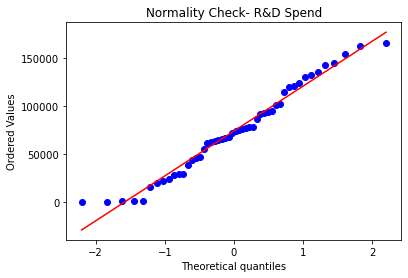

In [9]:
stats.probplot(x=startups_data['RD_Spend'],dist='norm', plot=plt)
plt.title('Normality Check- R&D Spend')
plt.show()

In [10]:
startups_data['RD_Spend'].skew()

0.164002172321177

In [11]:
startups_data['RD_Spend'].kurtosis()

-0.7614645568424674

#### Here data follows Approximatly Normal

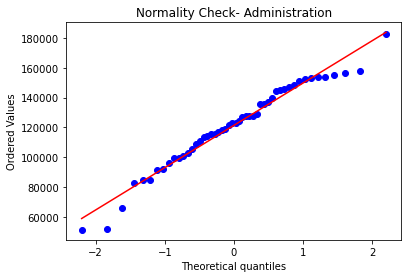

In [12]:
stats.probplot(x=startups_data['Administration'], dist='norm', plot=plt)
plt.title('Normality Check- Administration')
plt.show()

In [13]:
startups_data['Administration'].skew()

-0.4890248099671768

In [14]:
startups_data['Administration'].kurtosis()

0.22507113536865386

#### Normality Test failed

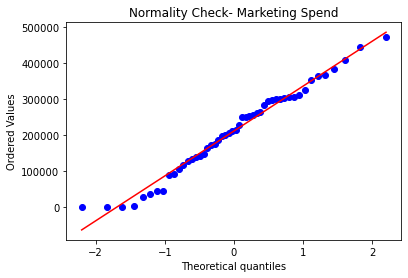

In [15]:
stats.probplot(x=startups_data['Marketing_Spend'], dist='norm', plot=plt)
plt.title('Normality Check- Marketing Spend')
plt.show()

In [16]:
startups_data['Marketing_Spend'].skew()

-0.04647226758360412

In [17]:
startups_data['Marketing_Spend'].kurtosis()

-0.6717011281297514

#### Normality Test is Passed

#### 2. Linearity Test

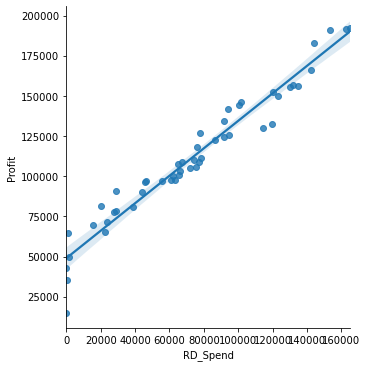

In [18]:
sns.lmplot(x='RD_Spend', y= 'Profit', data=startups_data)
plt.show()

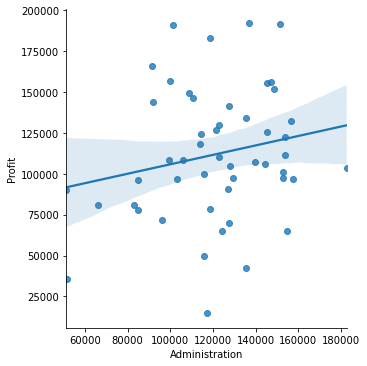

In [19]:
sns.lmplot(x='Administration', y= 'Profit', data=startups_data)
plt.show()

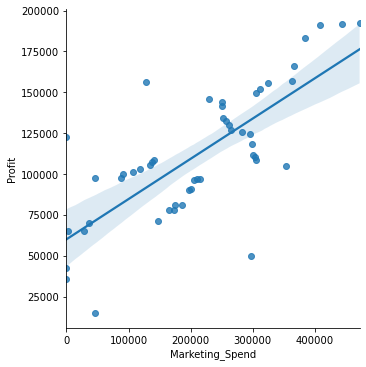

In [20]:
sns.lmplot(x='Marketing_Spend', y= 'Profit', data=startups_data)
plt.show()

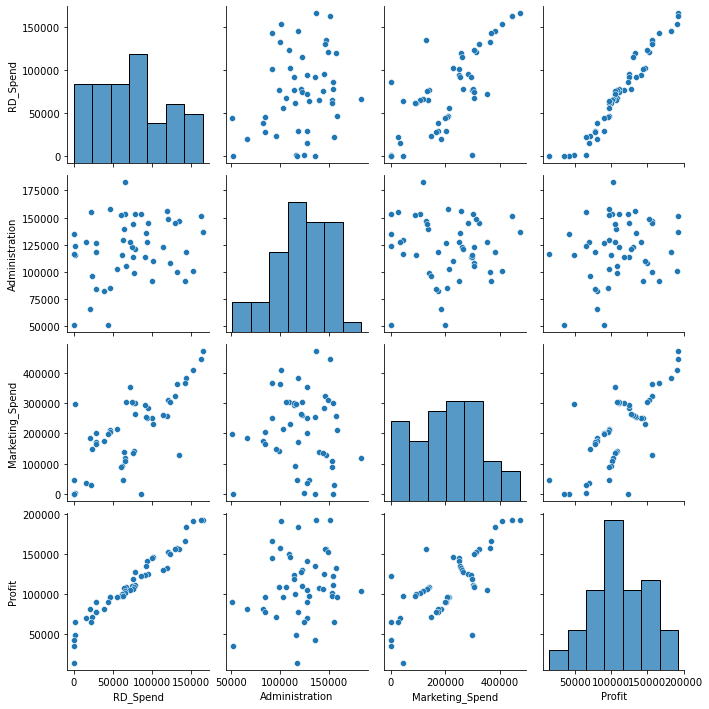

In [21]:
sns.pairplot(startups_data)
plt.show()

#### Linearity Test Failed

#### 3. Multi-collinearity Check

In [22]:
corr_matrix=startups_data.corr().round(2)
corr_matrix

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.00,0.24,0.72,0.97
Administration,0.24,1.00,-0.03,0.20
Marketing_Spend,0.72,-0.03,1.00,0.75
Profit,0.97,0.20,0.75,1.00


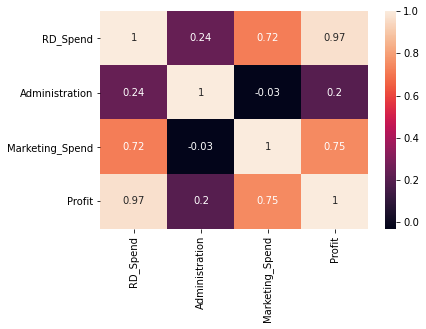

In [23]:
sns.heatmap(data=corr_matrix, annot=True)
plt.show()

#### Multicollinearity Problem Exists

#### 4. Auto-Regression Check

No time based inputs.

#### 5. Homoskedasticity Check | 6. Zero Residual Mean Check

This can be done post model training.

## 4. Model Building | 5. Model Training Using Statsmodel

In [24]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [25]:
linear_model=smf.ols(formula='Profit ~ RD_Spend+Administration+Marketing_Spend', data=startups_data).fit()

In [26]:
linear_model.params

Intercept          50122.192990
RD_Spend               0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [27]:
linear_model.pvalues

Intercept          1.057379e-09
RD_Spend           2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64

## 5. Model Evaluation

In [28]:
print('R-square                             :', round(linear_model.rsquared,4))
print('Adjisted R-square                    :', round(linear_model.rsquared_adj,4))
print('Akaike Information Criterian(AIC)    :', round(linear_model.aic,4))
print('Bayesian Information Criterian(BIC)  :', round(linear_model.bic,4))

R-square                             : 0.9507
Adjisted R-square                    : 0.9475
Akaike Information Criterian(AIC)    : 1058.7715
Bayesian Information Criterian(BIC)  : 1066.4196


#### Homoscadastisity Check

In [29]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

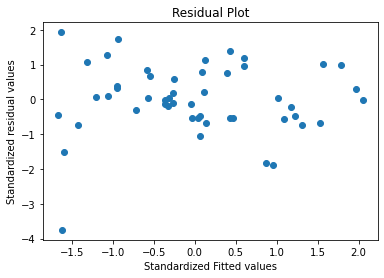

In [30]:
plt.scatter(get_standardized_values(linear_model.fittedvalues),
            get_standardized_values(linear_model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

#### Homoskedasticity Test Failed

#### 6. Zero Residual Mean Test
It is a plot b/w our Actual output vs Predicted output

In [31]:
y_pred=linear_model.predict()

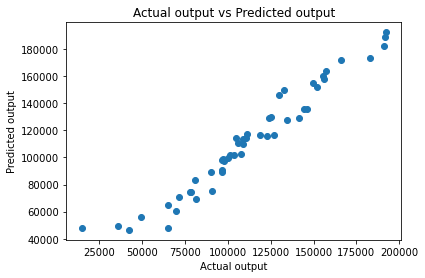

In [32]:
plt.scatter(x=startups_data[['Profit']],y=y_pred)
plt.title('Actual output vs Predicted output')
plt.xlabel('Actual output')
plt.ylabel('Predicted output')
plt.show()

#### Zero residual test is passed

## Model Optimization Techniques:

In [33]:
startups_data.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Hypothesis Statement:

* H0: This feature is not significant for prediction.
* H1: This is a significant for prediction.

LOS=5%

## =====================================================================

In [34]:
model_1=smf.ols(formula='Profit~RD_Spend', data=startups_data).fit()
print('R-square                             :', round(model_1.rsquared,4))
print('Adjisted R-square                    :', round(model_1.rsquared_adj,4))
print('Akaike Information Criterian(AIC)    :', round(model_1.aic,4))
print('Bayesian Information Criterian(BIC)  :', round(model_1.bic,4))

R-square                             : 0.9465
Adjisted R-square                    : 0.9454
Akaike Information Criterian(AIC)    : 1058.873
Bayesian Information Criterian(BIC)  : 1062.6971


In [35]:
model_2=smf.ols(formula='Profit~RD_Spend+Administration', data=startups_data).fit()
print('R-square                             :', round(model_2.rsquared,4))
print('Adjisted R-square                    :', round(model_2.rsquared_adj,4))
print('Akaike Information Criterian(AIC)    :', round(model_2.aic,4))
print('Bayesian Information Criterian(BIC)  :', round(model_2.bic,4))

R-square                             : 0.9478
Adjisted R-square                    : 0.9456
Akaike Information Criterian(AIC)    : 1059.6637
Bayesian Information Criterian(BIC)  : 1065.3998


In [36]:
model_3=smf.ols(formula='Profit~RD_Spend+Marketing_Spend', data=startups_data).fit()
print('R-square                             :', round(model_3.rsquared,4))
print('Adjisted R-square                    :', round(model_3.rsquared_adj,4))
print('Akaike Information Criterian(AIC)    :', round(model_3.aic,4))
print('Bayesian Information Criterian(BIC)  :', round(model_3.bic,4))

R-square                             : 0.9505
Adjisted R-square                    : 0.9483
Akaike Information Criterian(AIC)    : 1057.0708
Bayesian Information Criterian(BIC)  : 1062.8068


In [37]:
model_4=smf.ols(formula='Profit~RD_Spend+Marketing_Spend+Administration', data=startups_data).fit()
print('R-square                             :', round(model_4.rsquared,4))
print('Adjisted R-square                    :', round(model_4.rsquared_adj,4))
print('Akaike Information Criterian(AIC)    :', round(model_4.aic,4))
print('Bayesian Information Criterian(BIC)  :', round(model_4.bic,4))

R-square                             : 0.9507
Adjisted R-square                    : 0.9475
Akaike Information Criterian(AIC)    : 1058.7715
Bayesian Information Criterian(BIC)  : 1066.4196


In [38]:
model_5=smf.ols(formula='Profit~RD_Spend+Marketing_Spend+np.square(Administration)', data=startups_data).fit()
print('R-square                             :', round(model_5.rsquared,5))
print('Adjisted R-square                    :', round(model_5.rsquared_adj,5))
print('Akaike Information Criterian(AIC)    :', round(model_5.aic,5))
print('Bayesian Information Criterian(BIC)  :', round(model_5.bic,5))

R-square                             : 0.95082
Adjisted R-square                    : 0.94762
Akaike Information Criterian(AIC)    : 1058.69355
Bayesian Information Criterian(BIC)  : 1066.34165


#### By comparing Adjusted r_Square of each model we conclude that Model_3 is the best model.

### Analysis Of Residuals:

#### Normality Check

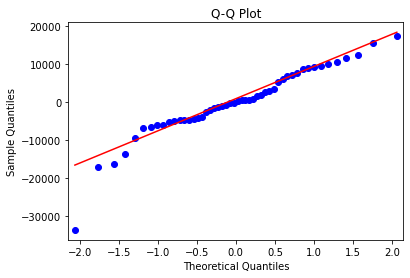

In [39]:
sm.qqplot(linear_model.resid, line='q')
plt.title('Q-Q Plot')
plt.show()

In [40]:
list(np.where(linear_model.resid<-20000))

[array([49], dtype=int64)]

#### Detecting Outlers

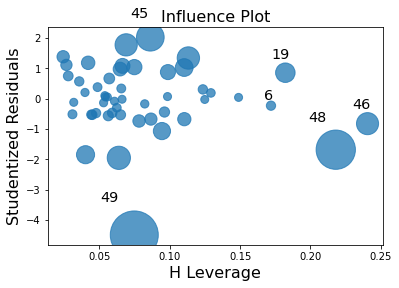

In [41]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(linear_model)
plt.show()

In [42]:
k = startups_data.shape[1]
n = startups_data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
print('Leverage cut-off:',leverage_cutoff)

Leverage cut-off: 0.36


In [43]:
model_influence = linear_model.get_influence()
(c, _) = model_influence.cooks_distance

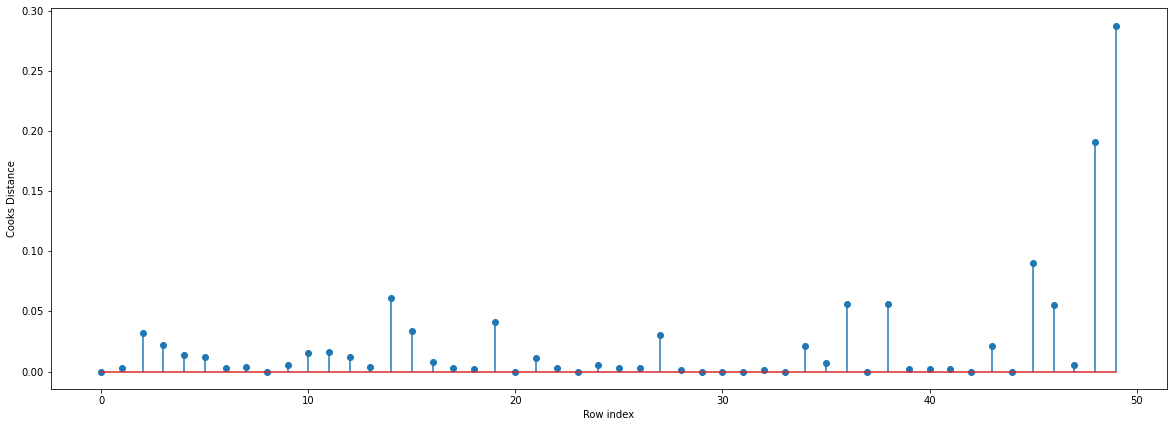

In [44]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startups_data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [45]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

#### From the above Residual Analysis, we came to know that index number 49 is an outlier.